In [ ]:
from keras.models import load_model
model = load_model('model100.h5')

In [155]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import spot as sp


In [156]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [157]:
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="4e7b220ab55e4887a6f275a639cd08a7", client_secret="a181a5078b0143b5a43d7f7e2883497f"))

playlist_limit = 2
song_limit_per_playlist = 15

In [158]:
def songs_by_emotion(emotion):
    results = sp.search(q=emotion,type='playlist', limit=playlist_limit)
    gs = []
    for el in results['playlists']['items']:
        temp = {}
        temp['playlist_name'] = el['name']
        temp['playlist_href'] = el['href']
        temp['playlist_id'] = el['id']
        temp['playlist_spotify_link'] = el['external_urls']['spotify']
        gs.append(temp)
    fnl_playlist_songs = gs
    for i in range(0,len(gs)):
        res = sp.playlist(playlist_id = gs[i]['playlist_id'])
        srn = res['tracks']['items'][0:song_limit_per_playlist]
        tlist = []
        for el in srn:
            tlist.append(el['track']['name'])
        fnl_playlist_songs[i]['playlist_songs'] = tlist
    return fnl_playlist_songs


In [159]:
def print_songs(fnl_playlist_songs):
    for el in fnl_playlist_songs:
        print('playlist_name : ' + str(el['playlist_name']))
        print('playlist_href : ' + str(el['playlist_href']))
        print('playlist_spotify_link : ' + str(el['playlist_spotify_link']))
        print('playlist_songs : ' )
        for i in range(0,len(el['playlist_songs'])):
            print(str(i+1) + ') ' + el['playlist_songs'][i])
        print('\n-------------------------------------------------------------------------------------------------------------')

In [160]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    res=(max(emotions))
    j=0
    for i in emotions:
        if(i==res) : break
        else : j=j+1
    
    Emotion=str(objects[j])
    print('Emotion Detected : ' + Emotion)
    print('Accuracy : '+ str(res*100))
    plt.show()
    return Emotion


1/1 [==============================] - 0s 250ms/step
Emotion Detected : fear
Accuracy : 99.82598423957825


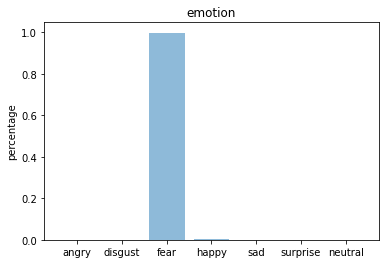

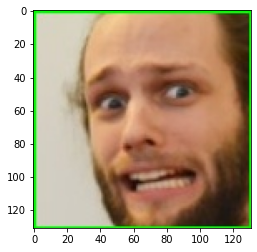

Couldn't read cache at: .cache



-------------------------------------------------------

Playlists Generated By Using The Emotion : fear

-------------------------------------------------------



Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


playlist_name : Fearless Motivation – Motivational Speeches
playlist_href : https://api.spotify.com/v1/playlists/6EF56fuiUgN2GOMVZIiXpq
playlist_spotify_link : https://open.spotify.com/playlist/6EF56fuiUgN2GOMVZIiXpq
playlist_songs : 
1) When You Feel Like Quitting (Motivational Speech)
2) I Didn't Come This Far to Only Come This Far (The Journey)
3) Dig Deeper (Motivational Speech)
4) We Are All Self Made
5) Your Results Are a Mirror (Motivational Speech)
6) Strong Mind Strong Life (Intro)
7) Disappear for a Year (Motivational Speech)
8) Feed Your Mind with Success (Motivational Speech)
9) Keep Going (Motivational Speech)
10) Warrior Mentality (Motivational Speech)
11) Change Something (Motivational Speech)
12) Stay Strong
13) Become Someone No One Thought You Could Be (Motivational Speech)
14) What Can I Do (Motivational Speech)
15) What Is My Why

-------------------------------------------------------------------------------------------------------------
playlist_name : This Is Tea

In [161]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image 
import keras
import keras.utils
from keras import utils as np_utils
def facecrop(image):
    #facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    img = cv2.imread(image)
    try:
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)
        faces = cascade.detectMultiScale(miniframe)
        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            sub_face = img[y:y+h, x:x+w]
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)
    except Exception as e:
        print (e)
        cv2.imshow(image, img)
        
if __name__ == '__main__':
    facecrop('test.jpg')
    file = 'capture.jpg'
    true_image = keras.utils.load_img(file)
    img = keras.utils.load_img(file, grayscale=True, target_size=(48, 48))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255
    custom = model.predict(x)
    final_Emotion=emotion_analysis(custom[0])
    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);
    plt.gray()
    plt.imshow(true_image)
    plt.show()
    print('\n-------------------------------------------------------\n')
    print('Playlists Generated By Using The Emotion : ' + final_Emotion)
    print('\n-------------------------------------------------------\n')
    final_list = songs_by_emotion(final_Emotion)
    print_songs(final_list)

        